# Part II - (Prosper Loan Data Presentation)
## by (Ndifreke Charles)


## Investigation Overview


> This Investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income


## Dataset Overview

> Prosper Loan Data (prosperloanData.csv) represents personal loans requested through Prosper's peer to peer loan servicing network. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loanss = pd.read_csv('prosperLoanData.csv')

# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loans = loanss[cols]
# data wrangling, remove loans with missing borrower APR information
loans = loans[~loans.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loans = loans[loans.StatedMonthlyIncome<=30000]

# convert ProsperRating (Alpha) to ordered categorical types

rating_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113585 entries, 0 to 113936
Data columns (total 6 columns):
LoanOriginalAmount       113585 non-null int64
BorrowerAPR              113585 non-null float64
StatedMonthlyIncome      113585 non-null float64
Term                     113585 non-null int64
ProsperRating (Alpha)    84604 non-null category
EmploymentStatus         111364 non-null object
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 5.3+ MB


## BORROWER APR 

> This histogram plot shows that the Borrower's APR has it's highest peak at 0.36, the second highest peak is at 0.3. Only very few loans have APR greater than 0.4.

Text(0.5,1,'What BorrowerAPR has the highest count?')

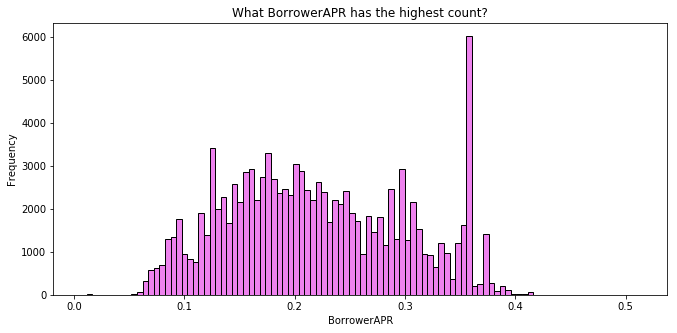

In [4]:
plt.figure(figsize=[11,5])
plt.hist(data = loans,x = 'BorrowerAPR', color='violet', edgecolor='black', bins=100)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.title('What BorrowerAPR has the highest count?')

## What Loan amount is commonly requested for?

>  It is observed that the commonly request loan amount is 4,000, followed by 15,000 and 10,000. Very few borrowers request for loans above 30,000.

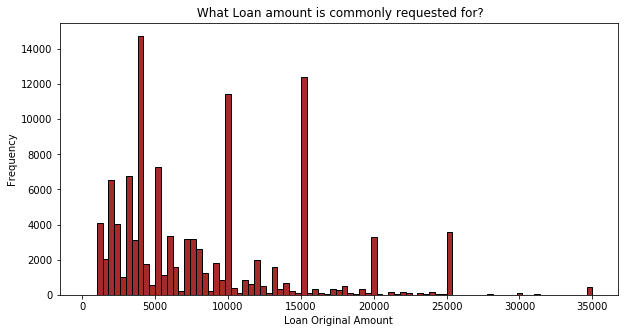

In [5]:
#plotting a Histogram to show the Loan Original Amount
plt.figure(figsize=[10,5])

bins = np.arange(200, loans.LoanOriginalAmount.max()+400, 400)
plt.hist(data = loans, x = 'LoanOriginalAmount', color='brown', edgecolor='black',bins = bins);
plt.title(" What Loan amount is commonly requested for?")
plt.xlabel('Loan Original Amount')
plt.ylabel("Frequency")
plt.show()

## Borrower APR by Rating and Term

>  I observed that as the prosper rating increases the Borrower APR increases.

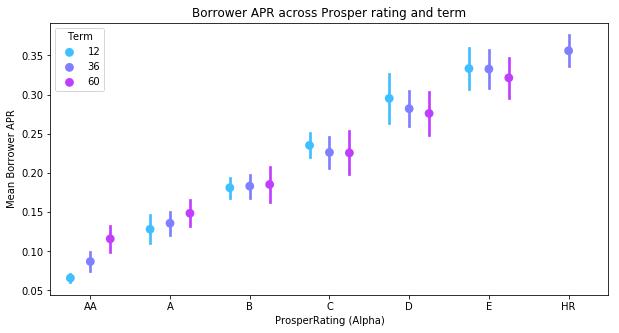

In [6]:
# Exploring the relationship between borrower APR, Term and Prosper Rating
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'cool', ci='sd', linestyles = '', dodge = 0.5);
plt.title('Borrower APR across Prosper rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## Effect of ProsperRating (Alpha) on APR and LoanOriginalAmount


> I observed that The loan original amount increases with better rating. The borrower APR decreases with better rating.

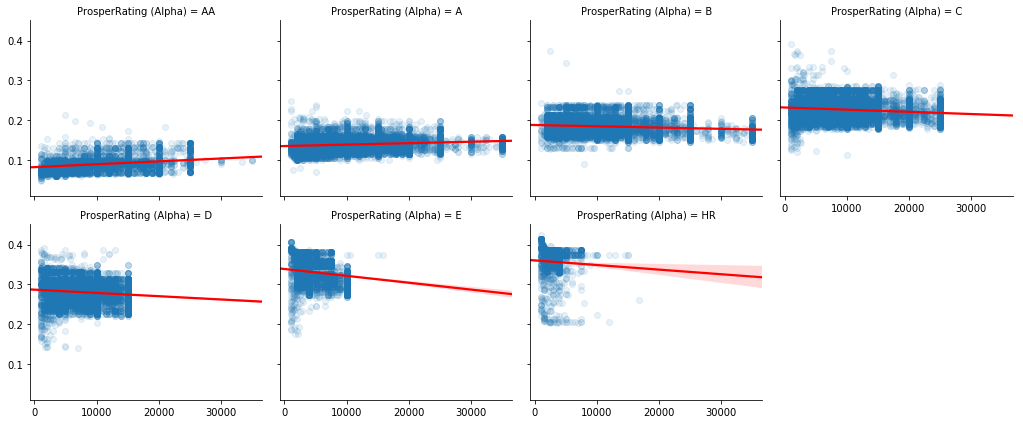

In [7]:
#Plotting a Regression plot to show the effect of ProsperRating (Alpha) on APR and LoanOriginalAmount 

g = sb.FacetGrid(data = loans, aspect=1.2,col="ProsperRating (Alpha)", col_wrap=4, margin_titles=True)
g.map_dataframe(sb.regplot, x="LoanOriginalAmount", y="BorrowerAPR", scatter_kws={'alpha': 2/20}, line_kws={'color':'red'})
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 453122 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 